In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats
import pandas as pd
import sqlite3


# Set custom color cycle
custom_colors = [    
    '#0081C8',  # Olynmpic Blue
    '#FCB131', # Olympic Yellow
    '#000000', # Olympic Black
    '#00A651',  # Olympic Green
    '#EE334E',  # Olynmpic Red
    '#F47835',  # Olympic Orange
    '#7C878E',  # Olympic Grey
    '#C8102E',  # Olympic Red
    '#EF3340',  # Olympic Red
    '#FFD662',  # Olympic Yellow
    '#00539C',  # Olympic Blue
]

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=custom_colors)

In [2]:
pd.set_option('display.max_columns', None)

file_path = "/groups/icecube/simon/GNN/workspace/data/Converted_I3_file/upgrade_muongun_step4_130028_000000.db"

con = sqlite3.connect(file_path)

cur = con.cursor()

table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type='table'")]

print(table_list)

# Load data from CSV
df_truth = pd.read_sql_query("SELECT * FROM truth", con)
df_MMC = pd.read_sql_query("SELECT * FROM I3MMCTrackList", con)
df_splits = pd.read_sql_query("SELECT * FROM SplitInIcePulsesSRT", con)
df_splits.head()


[('truth',), ('I3MMCTrackList',), ('SplitInIcePulsesSRT',)]


,pmt_dir_x,pmt_dir_y,pmt_dir_z,charge,dom_time,width,dom_x,dom_y,dom_z,pmt_area,rde,is_bright_dom,is_bad_dom,is_saturated_dom,is_errata_dom,event_time,hlc,awtd,string,pmt_number,dom_number,dom_type,event_no
0,0.0,0.0,-1.0,1.100153,18702.693789,0.833231,-413.46,-327.27,227.26,0.0444,1.0,-1.0,-1.0,-1.0,-1.0,59000.171844,1.0,1.0,14.0,0.0,17.0,20.0,0
1,0.0,0.0,-1.0,1.464326,18351.332832,0.833259,-413.46,-327.27,210.24,0.0444,1.0,-1.0,-1.0,-1.0,-1.0,59000.171844,1.0,1.0,14.0,0.0,18.0,20.0,0
2,0.0,0.0,-1.0,1.148925,18359.643660,0.833341,-413.46,-327.27,193.22,0.0444,1.0,-1.0,-1.0,-1.0,-1.0,59000.171844,1.0,1.0,14.0,0.0,19.0,20.0,0
3,0.0,0.0,-1.0,0.824961,18439.014510,0.833401,-413.46,-327.27,159.18,0.0444,1.0,-1.0,-1.0,-1.0,-1.0,59000.171844,1.0,1.0,14.0,0.0,21.0,20.0,0
4,0.0,0.0,-1.0,0.382833,19210.185950,6.250000,-413.46,-327.27,159.18,0.0444,1.0,-1.0,-1.0,-1.0,-1.0,59000.171844,1.0,0.0,14.0,0.0,21.0,20.0,0


In [3]:
df_truth.head()

,energy,position_x,position_y,position_z,azimuth,zenith,pid,event_time,sim_type,interaction_type,elasticity,RunID,SubrunID,EventID,SubEventID,dbang_decay_length,track_length,stopped_muon,energy_track,energy_cascade,inelasticity,DeepCoreFilter_13,CascadeFilter_13,MuonFilter_13,OnlineL2Filter_17,L3_oscNext_bool,L4_oscNext_bool,L5_oscNext_bool,L6_oscNext_bool,L7_oscNext_bool,DeepCoreUpgradeFilter_13,event_no
0,183.009423,-304.682738,-185.969129,-13.792029,4.164466,0.810170,13.0,1.306125e+17,NuGen,-1.0,-1.0,0.0,4.294967e+09,8.0,0.0,-1.0,642.896244,1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,0
1,124.576752,63.254573,121.228136,431.383511,6.129085,0.642492,13.0,1.306125e+17,NuGen,-1.0,-1.0,0.0,4.294967e+09,24.0,0.0,-1.0,460.422485,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1
2,811.126258,1219.977982,-444.941638,-914.291929,3.138247,1.069025,13.0,1.306125e+17,NuGen,-1.0,-1.0,0.0,4.294967e+09,33.0,0.0,-1.0,2154.622121,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,2
3,811.126258,1219.977982,-444.941638,-914.291929,3.138247,1.069025,13.0,1.306125e+17,NuGen,-1.0,-1.0,0.0,4.294967e+09,33.0,1.0,-1.0,2154.622121,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,3
4,230.143105,-262.587484,417.385327,-170.044068,3.241997,0.595420,13.0,1.306125e+17,NuGen,-1.0,-1.0,0.0,4.294967e+09,36.0,0.0,-1.0,798.144311,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,4


In [11]:
z_start = -13.792029 + np.cos(0.81017)*642.896244
z_start

429.40475832793123

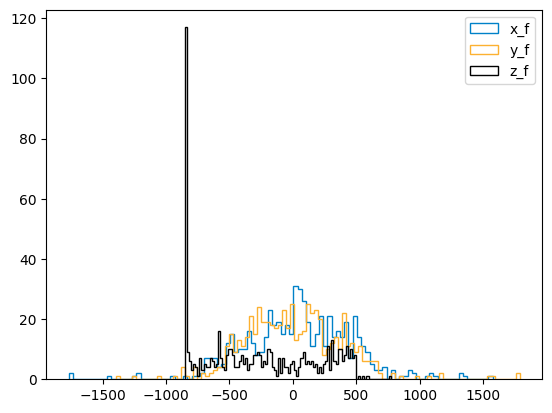

In [4]:
# Plot a histogram of xf
plt.figure()
plt.hist(df_splits['xf'], bins=100, histtype='step', label='x_f')
plt.hist(df_splits['yf'], bins=100, histtype='step', label='y_f')
plt.hist(df_splits['zf'], bins=100, histtype='step', label='z_f')
plt.legend()
plt.show()


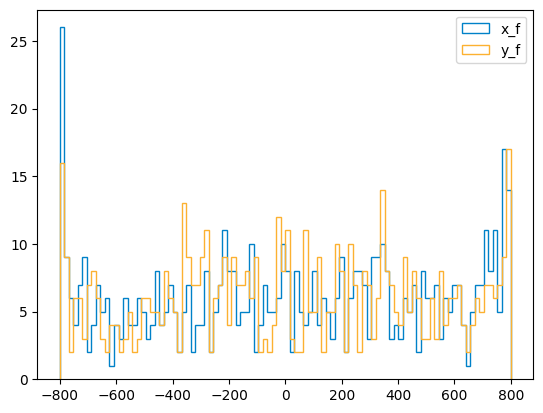

In [5]:
# Plot a histogram of xf
plt.figure()
plt.hist(df_splits['xi'], bins=100, histtype='step', label='x_f')
plt.hist(df_splits['yi'], bins=100, histtype='step', label='y_f')
#plt.hist(df_splits['zi'], bins=100, histtype='step', label='z_f')
plt.legend()
plt.show()


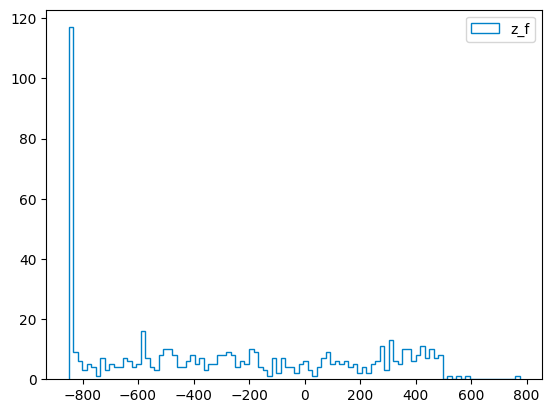

In [6]:
plt.figure()
plt.hist(df_splits['zf'], bins=100, histtype='step', label='z_f')
plt.legend()

In [7]:
# The cherenkov radiation is emitted when a charged particle travels through a medium with a speed greater than the speed of light in that medium.
# Given by the Frank-Tamm formula, the energy loss per unit length due to Cherenkov radiation is given by:
from scipy.integrate import quad

def refractive_index(frequency):
    """
    Define the frequency-dependent refractive index for clear ice.
    
    Parameters:
    - frequency (float): Frequency in Hz.
    
    Returns:
    - n (float): Refractive index at the given frequency.
    """
    # Approximate model for clear ice (can be adjusted based on data)
    freq_thz = frequency * 1e-12
    n = 1.31 + 0.00005 * (freq_thz - 500)  # Example dispersion around 500 THz (visible light range)
    return n

def permeability(frequency):
    """
    Define the frequency-dependent permeability for clear ice.
    
    Parameters:
    - frequency (float): Frequency in Hz.
    
    Returns:
    - mu (float): Permeability at the given frequency.
    """
    # Permeability is approximately 1 for non-magnetic materials like ice
    return 1.0

def energy_loss_per_unit_length_integrand(omega, beta, charge, speed_of_light):
    """
    Calculate the differential energy loss per unit length and angular frequency due to Cherenkov radiation.
    
    Parameters:
    - omega (float): Angular frequency in rad/s.
    - beta (float): Particle velocity as a fraction of the speed of light (v/c).
    - charge (float): Charge of the particle in Coulombs.
    - speed_of_light (float): Speed of light in m/s.
    
    Returns:
    - d^2E / (dω dx) (float): Energy loss rate per unit angular frequency and unit length (GeV/(rad/s)/m).
    """
    frequency = omega / (2 * np.pi)
    n = refractive_index(frequency)
    mu = permeability(frequency)
    
    # Calculate the term (1 - (c^2 / (v^2 * n(omega)^2)))
    term = 1 - (1 / (beta**2 * n**2))
    
    # Differential energy loss rate per unit length and angular frequency
    energy_loss = (charge**2 / (4 * np.pi)) * mu * omega * term
    
    # Convert energy loss to GeV (1 Joule = 6.242e9 GeV)
    return energy_loss

def calculate_cherenkov_energy_loss_per_unit_length(energy, particle_type, charge, min_freq, max_freq):
    """
    Calculate the total energy loss due to Cherenkov radiation per unit length over a frequency range.
    
    Parameters:
    - energy (float): Starting energy of the particle in GeV.
    - particle_type (str): Type of particle ('electron', 'muon', 'neutrino', etc.).
    - charge (float): Charge of the particle in Coulombs.
    - min_freq (float): Minimum frequency in Hz for the integration range.
    - max_freq (float): Maximum frequency in Hz for the integration range.
    
    Returns:
    - total_energy_loss_per_unit_length (float): Total energy loss per unit length in GeV/m.
    """
    
    # Constants
    speed_of_light = 3.0e8  # Speed of light in vacuum (m/s)
    electron_mass = 0.511e-3  # Electron mass in GeV/c^2
    muon_mass = 105.66e-3  # Muon mass in GeV/c^2

    # Select particle mass based on type
    if particle_type.lower() == 'electron':
        mass = electron_mass
    elif particle_type.lower() == 'muon':
        mass = muon_mass
    elif particle_type.lower() == 'neutrino':
        print("Neutrinos do not emit Cherenkov radiation.")
        return 0.0
    else:
        raise ValueError("Unsupported particle type. Use 'electron', 'muon', or 'neutrino'.")

    # Calculate particle speed (v/c)
    gamma = energy / mass  # Lorentz factor
    beta = np.sqrt(1 - 1 / gamma**2)  # v/c

    # Convert frequency range to angular frequency range
    min_omega = 2 * np.pi * min_freq
    max_omega = 2 * np.pi * max_freq

    # Integrate the energy loss per unit length over the angular frequency range
    total_energy_loss_per_unit_length, _ = quad(
        energy_loss_per_unit_length_integrand, min_omega, max_omega, args=(beta, charge, speed_of_light)
    )

    return total_energy_loss_per_unit_length


# Example usage
starting_energy = 10.0  # GeV
particle_type = 'muon'
charge = 1.602e-19  # Charge of an electron in Coulombs
min_freq = 4e14  # Minimum frequency in Hz (e.g., visible light range start)
max_freq = 8e14  # Maximum frequency in Hz (e.g., visible light range end)

energy_loss_per_length = calculate_cherenkov_energy_loss_per_unit_length(
    starting_energy, particle_type, charge, min_freq, max_freq
)

print(f"Energy loss per unit length due to Cherenkov radiation: {energy_loss_per_length:.6f} GeV/m")


Energy loss per unit length due to Cherenkov radiation: 0.000000 GeV/m


In [8]:
# The Bethe-Bloch equation describes the energy loss of charged particles as they pass through matter.

def density_effect_correction(beta_gamma, I0, C0, gamma0):
    """
    Calculate the density effect correction δ(βγ).
    
    Parameters:
    - beta_gamma (float): Product of β and γ (relativistic parameters).
    - I0 (float): Density effect constant I_0.
    - C0 (float): Density effect constant C_0.
    - gamma0 (float): Threshold for applying density correction.
    
    Returns:
    - delta (float): Density effect correction.
    """
    if beta_gamma < gamma0:
        return 0.0
    else:
        return 2 * np.log(beta_gamma) - np.log(I0) - C0

def bethe_bloch(energy, particle_type, charge, Z, A, I, I0, C0, gamma0):
    """
    Calculate the energy loss per unit length (stopping power) using the Bethe-Bloch equation with density effect correction.
    
    Parameters:
    - energy (float): Energy of the particle in GeV.
    - particle_type (str): Type of particle ('electron', 'muon', etc.).
    - charge (float): Charge of the particle in units of elementary charge (e.g., 1 for proton).
    - Z (float): Atomic number of the medium.
    - A (float): Atomic mass of the medium in atomic mass units.
    - I (float): Mean excitation potential of the medium in eV.
    - I0 (float): Density effect constant I_0.
    - C0 (float): Density effect constant C_0.
    - gamma0 (float): Threshold for applying density correction.
    
    Returns:
    - dE_dx (float): Energy loss per unit length in MeV/cm.
    """
    # Constants
    K = 0.307  # MeV g^-1 cm^2, constant in the Bethe equation
    electron_mass = 0.511e-3  # Electron mass in GeV/c^2
    muon_mass = 105.66e-3  # Muon mass in GeV/c^2

    # Particle mass based on type
    if particle_type.lower() == 'electron':
        mass = electron_mass
    elif particle_type.lower() == 'muon':
        mass = muon_mass
    else:
        raise ValueError("Unsupported particle type. Use 'electron' or 'muon'.")

    # Calculate particle speed (v/c)
    gamma = energy / mass  # Lorentz factor
    beta = np.sqrt(1 - 1 / gamma**2)  # v/c
    beta_gamma = beta * gamma

    # Maximum transferable kinetic energy to a free electron
    W_max = 2 * electron_mass * (beta_gamma)**2 / (1 + 2 * gamma * electron_mass / mass + (electron_mass / mass)**2)

    # Density effect correction
    delta = density_effect_correction(beta_gamma, I0, C0, gamma0)

    # Bethe-Bloch equation for energy loss per unit length (stopping power)
    dE_dx = (
        -K * charge**2 * Z / A / beta**2
        * (np.log(2 * electron_mass * (beta**2) * (gamma**2) * W_max / (I * 1e-6)**2) - 2 * beta**2 - delta)
    )
    dE_dx   # Convert from MeV/cm to GeV/m
    return dE_dx # GeV/m


# Example usage
starting_energy = 10.0  # GeV
particle_type = 'muon'

charge = 1  # Muon charge in units of elementary charge
Z = 7.42  # Effective Z for ice (average of hydrogen and oxygen)
A = 18.015  # Effective A for ice (molecular mass of water)
I = 77.8  # Mean excitation potential of ice in eV (approximate)

# Density effect parameters for ice (approximate values)
I0 = 2.0e-6  # I_0 constant in natural units
C0 = 3.0  # C_0 constant (approximate)
gamma0 = 10.0  # Gamma threshold for density effect

energy_loss_per_length = bethe_bloch(starting_energy, particle_type, charge, Z, A, I, I0, C0, gamma0)

print(f"Energy loss per unit length due to Bethe-Bloch equation with density effect: {energy_loss_per_length:.6f} MeV/cm")


Energy loss per unit length due to Bethe-Bloch equation with density effect: -0.187006 MeV/cm


In [9]:
import os,sys
import numpy as np
import sqlite3
import pandas as pd
pd.set_option('display.max_columns', None)

#file_path = "/groups/icecube/simon/GNN/workspace/data/Converted_I3_file/upgrade_genie_level4_queso_141029_000002.db"
file_path = "/groups/icecube/simon/GNN/workspace/data/Converted_I3_file/merged.db"#"/lustre/hpc/project/icecube/MuonGun_upgrade_full_detector_generation_volume_no_kde/130028/merged/merged.db"
#gcd_file_path = "/lustre/hpc/project/icecube/MuonGun_upgrade_full_detector_generation_volume_no_kde/130028/GCD/GeoCalibDetectorStatus_ICUpgrade.v58.mixed.V1.i3.bz2"
con = sqlite3.connect(file_path)

cur = con.cursor()

table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type='table'")]

print(table_list)

# Load data from CSV
df_truth = pd.read_sql_query("SELECT * FROM truth", con)
df_splits = pd.read_sql_query("SELECT * FROM SplitInIcePulsesSRT", con)


[('truth',), ('SplitInIcePulsesSRT',)]


In [10]:
df_truth.head()

,energy,position_x,position_y,position_z,azimuth,zenith,pid,event_time,sim_type,interaction_type,elasticity,RunID,SubrunID,EventID,SubEventID,dbang_decay_length,track_length,stopped_muon,energy_track,energy_cascade,inelasticity,DeepCoreFilter_13,CascadeFilter_13,MuonFilter_13,OnlineL2Filter_17,L3_oscNext_bool,L4_oscNext_bool,L5_oscNext_bool,L6_oscNext_bool,L7_oscNext_bool,event_no
0,729.390407,982.961673,594.939024,-928.688384,4.069653,0.687941,13.0,1.306125e+17,NuGen,-1.0,-1.0,0.0,4.294967e+09,5.0,0.0,-1.0,2237.624109,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0
1,729.390407,982.961673,594.939024,-928.688384,4.069653,0.687941,13.0,1.306125e+17,NuGen,-1.0,-1.0,0.0,4.294967e+09,5.0,1.0,-1.0,2237.624109,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1
2,634.101516,221.364234,10.709177,-1272.411473,6.048468,0.461047,13.0,1.306125e+17,NuGen,-1.0,-1.0,0.0,4.294967e+09,10.0,0.0,-1.0,1314.488429,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2
3,122.365256,-364.496407,-214.453955,438.359962,3.309485,0.634273,13.0,1.306125e+17,NuGen,-1.0,-1.0,0.0,4.294967e+09,15.0,0.0,-1.0,448.962015,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3
4,136.919834,-182.818545,-470.404332,446.924230,1.952179,0.750887,13.0,1.306125e+17,NuGen,-1.0,-1.0,0.0,4.294967e+09,16.0,0.0,-1.0,482.948135,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4


In [11]:
#Print how many events have SubEventID = 1.0 and stopped_muon = 1.0
print(df_truth[(df_truth['SubEventID'] == 1.0) & (df_truth['stopped_muon'] == 1.0)].shape[0])
#Print len of df_truth
print(df_truth.shape[0])

15300
665742


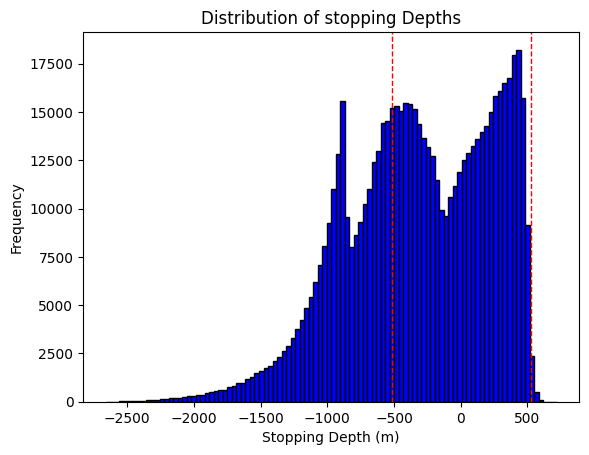

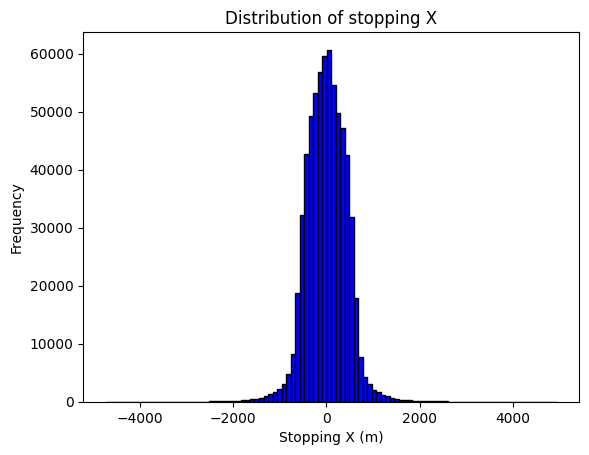

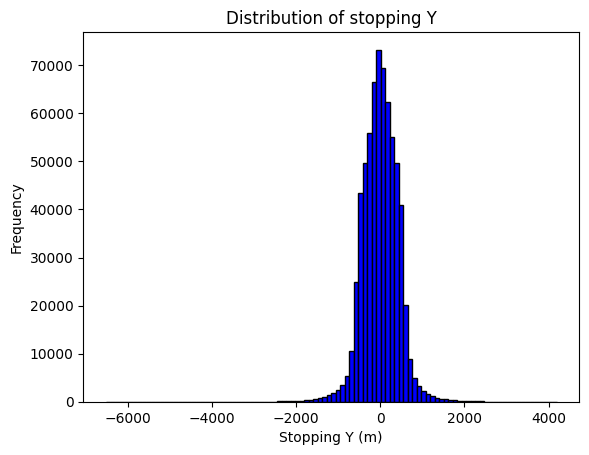

In [12]:
import matplotlib.pyplot as plt
starting_depths = df_truth['position_z']
# For the starting depths, mark border_z = np.array([-512.82, 524.56])
border_z = np.array([-512.82, 524.56])

plt.hist(starting_depths, bins=100, color='blue', edgecolor='black')
plt.axvline(x=border_z[0], color='red', linestyle='dashed', linewidth=1)
plt.axvline(x=border_z[1], color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of stopping Depths')
plt.xlabel('Stopping Depth (m)')
plt.ylabel('Frequency')
plt.show()

starting_x = df_truth['position_x']
starting_y = df_truth['position_y']
plt.hist(starting_x, bins=100, color='blue', edgecolor='black')
plt.title('Distribution of stopping X')
plt.xlabel('Stopping X (m)')
plt.ylabel('Frequency')
plt.show()

plt.hist(starting_y, bins=100, color='blue', edgecolor='black')
plt.title('Distribution of stopping Y')
plt.xlabel('Stopping Y (m)')
plt.ylabel('Frequency')
plt.show()



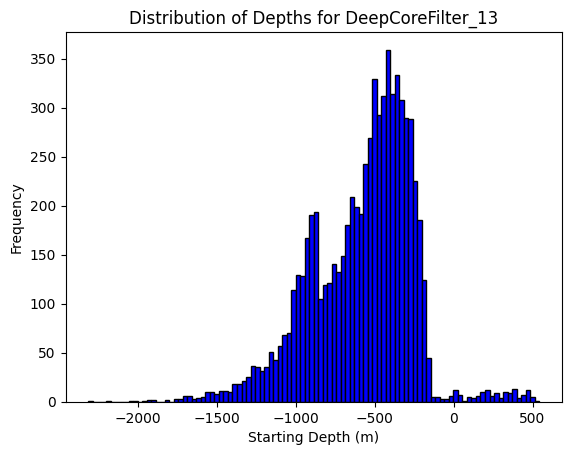

In [13]:
#Check if the particle triggers DeepCoreFilter_13
# Plot the distribution of events that trigger DeepCoreFilter_13
deepcore_truth = df_truth[df_truth['DeepCoreFilter_13'] == 1.0]

plt.hist(deepcore_truth['position_z'], bins=100, color='blue', edgecolor='black')
plt.title('Distribution of Depths for DeepCoreFilter_13')
plt.xlabel('Starting Depth (m)')
plt.ylabel('Frequency')
plt.show()

    

In [14]:
#IceCube fiducial:
#Origin = (0.0, 0.0, 0.0) m
#Radius = 600.0 m
#z = (-511.93000000000006, 498.06999999999994) m  / (2460, 1450) m (depth)


def check_fiducial_volume(df_truth):
    """
    Check if the starting position of the particle is within the IceCube fiducial volume.
    
    Parameters:
    - df_truth (pd.DataFrame): DataFrame containing the truth information.
    
    Returns:
    - n_fiducial (int): Number of events within the fiducial volume.
    - event_no (list): List of event numbers within the fiducial volume.
    """
    # Define the IceCube fiducial volume
    origin = np.array([0.0, 0.0, 0.0])
    radius = 600.0
    z_min = -511.93
    z_max = 498.07
    
    # Calculate the distance from the origin
    starting_x = df_truth['position_x']
    starting_y = df_truth['position_y']
    starting_z = df_truth['position_z']
    distances = np.sqrt(starting_x**2 + starting_y**2)
    
    # Check if the starting position is within the fiducial volume
    n_fiducial = 0
    event_no = []
    for i, distance in enumerate(distances):
        if distance < radius and starting_z[i] > z_min and starting_z[i] < z_max:
            n_fiducial += 1
            event_no.append(i)
    print(np.pi * radius**2*(z_max-z_min))
    return n_fiducial, event_no

n_fiducial, event_no = check_fiducial_volume(df_truth)
print(f"Number of events within the fiducial volume: {n_fiducial}")
print(f"Event numbers within the fiducial volume: {event_no}")

1142283088.845249
Number of events within the fiducial volume: 332391
Event numbers within the fiducial volume: [3, 4, 8, 9, 10, 12, 13, 14, 15, 18, 23, 28, 32, 34, 36, 38, 39, 41, 42, 45, 46, 48, 50, 52, 53, 54, 55, 57, 59, 60, 61, 66, 67, 69, 70, 74, 76, 77, 78, 79, 80, 83, 87, 90, 91, 92, 98, 106, 111, 113, 117, 118, 122, 126, 127, 130, 131, 134, 135, 136, 137, 139, 143, 144, 145, 146, 148, 149, 154, 159, 160, 163, 164, 165, 166, 167, 168, 169, 171, 175, 176, 177, 178, 180, 181, 184, 187, 192, 193, 194, 195, 197, 199, 200, 205, 206, 210, 211, 214, 218, 221, 226, 227, 228, 230, 232, 234, 239, 240, 241, 243, 244, 245, 246, 251, 252, 254, 255, 257, 258, 259, 261, 262, 263, 265, 267, 268, 269, 270, 271, 274, 277, 280, 284, 285, 292, 295, 296, 297, 298, 299, 302, 304, 305, 307, 313, 315, 317, 318, 319, 320, 321, 322, 325, 327, 328, 329, 330, 331, 332, 333, 334, 336, 337, 338, 339, 345, 346, 348, 349, 351, 353, 354, 355, 356, 357, 362, 364, 365, 366, 367, 369, 373, 376, 377, 380, 381, 382

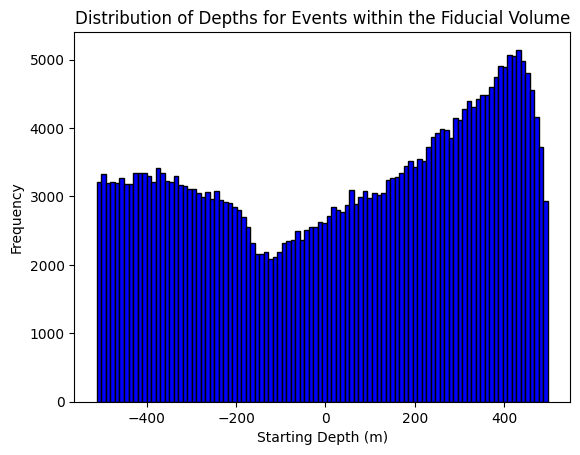

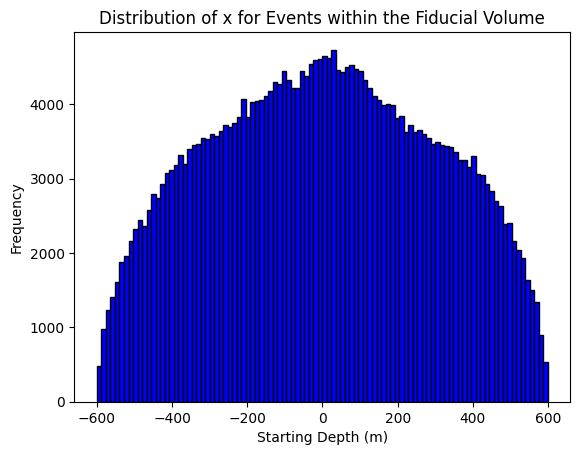

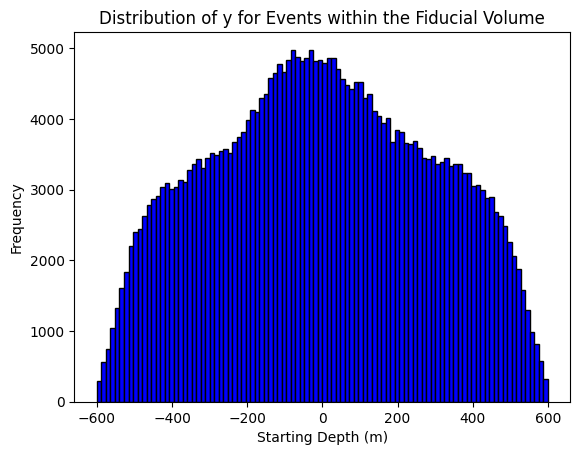

In [15]:
# Plot the distribution of events within the fiducial volume
fiducial_truth = df_truth.loc[event_no]

plt.hist(fiducial_truth['position_z'], bins=100, color='blue', edgecolor='black')
plt.title('Distribution of Depths for Events within the Fiducial Volume')
plt.xlabel('Starting Depth (m)')
plt.ylabel('Frequency')
plt.show()


plt.hist(fiducial_truth['position_x'], bins=100, color='blue', edgecolor='black')
plt.title('Distribution of x for Events within the Fiducial Volume')
plt.xlabel('Starting Depth (m)')
plt.ylabel('Frequency')
plt.show()

plt.hist(fiducial_truth['position_y'], bins=100, color='blue', edgecolor='black')
plt.title('Distribution of y for Events within the Fiducial Volume')
plt.xlabel('Starting Depth (m)')
plt.ylabel('Frequency')
plt.show()


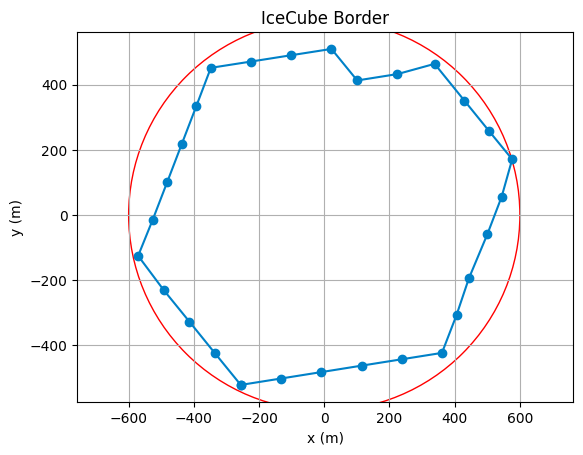

Surface area of the IceCube border: 851888.17 m^2
Volume of the IceCube border: 883731754.46 m^3


In [16]:
# Make a plot of the following coordinates:
border_xy = np.array(
                [
                    (-256.1400146484375, -521.0800170898438),
                    (-132.8000030517578, -501.45001220703125),
                    (-9.13000011444092, -481.739990234375),
                    (114.38999938964844, -461.989990234375),
                    (237.77999877929688, -442.4200134277344),
                    (361.0, -422.8299865722656),
                    (405.8299865722656, -306.3800048828125),
                    (443.6000061035156, -194.16000366210938),
                    (500.42999267578125, -58.45000076293945),
                    (544.0700073242188, 55.88999938964844),
                    (576.3699951171875, 170.9199981689453),
                    (505.2699890136719, 257.8800048828125),
                    (429.760009765625, 351.0199890136719),
                    (338.44000244140625, 463.7200012207031),
                    (224.5800018310547, 432.3500061035156),
                    (101.04000091552734, 412.7900085449219),
                    (22.11000061035156, 509.5),
                    (-101.05999755859375, 490.2200012207031),
                    (-224.08999633789062, 470.8599853515625),
                    (-347.8800048828125, 451.5199890136719),
                    (-392.3800048828125, 334.239990234375),
                    (-437.0400085449219, 217.8000030517578),
                    (-481.6000061035156, 101.38999938964844),
                    (-526.6300048828125, -15.60000038146973),
                    (-570.9000244140625, -125.13999938964844),
                    (-492.42999267578125, -230.16000366210938),
                    (-413.4599914550781, -327.2699890136719),
                    (-334.79998779296875, -424.5),(-256.1400146484375, -521.0800170898438)
                ])
 
plt.plot(border_xy[:,0], border_xy[:,1], 'o-')
plt.title('IceCube Border')
plt.grid()
plt.xlabel('x (m)')
plt.ylabel('y (m)')
# On top plot a circle with a radius of 600 m
circle = plt.Circle((0, 0), 600, color='r', fill=False)
plt.gca().add_artist(circle)
plt.axis('equal')
plt.show()

border_z = np.array([-512.82, 524.56])
# Calculate the surface area of the IceCube border
def calculate_surface_area(border_xy):
    """
    Calculate the surface area of the IceCube border.
    
    Parameters:
    - border_xy (np.array): Array of (x, y) coordinates of the IceCube border.
    
    Returns:
    - surface_area (float): Surface area of the IceCube border in m^2.
    """
    # Calculate the surface area of the IceCube border
    x = border_xy[:, 0]
    y = border_xy[:, 1]
    surface_area = 0.5 * np.sum(x[:-1] * y[1:] - x[1:] * y[:-1])
    return surface_area
#border_z = np.array([-512.82, 524.56])
surface_area = calculate_surface_area(border_xy)
print(f"Surface area of the IceCube border: {surface_area:.2f} m^2")
#1142283088
#851.888
height = border_z[1] - border_z[0]
volume = surface_area * height
print(f"Volume of the IceCube border: {volume:.2f} m^3")

In [17]:
from matplotlib.path import Path
def is_particles_within_volume(df, border_xy, z_range):
    """
    Check if each particle in the DataFrame is within the defined 3D volume.
    
    Parameters:
    - df (pd.DataFrame): DataFrame with 'position_x', 'position_y', 'position_z' columns.
    - border_xy (np.array): Array of (x, y) coordinates defining the boundary in the x-y plane.
    - z_range (np.array): Array with two elements, the min and max z values.
    
    Returns:
    - pd.Series: Boolean Series indicating if each particle is within the volume.
    """
    # Create a Path object for the 2D polygon boundary
    polygon_path = Path(border_xy)
    
    # Check if z is within the specified range
    z_within_range = (df['position_z'] >= z_range[0]) & (df['position_z'] <= z_range[1])
    
    # Check if (x, y) is inside the polygon in the x-y plane
    xy_within_polygon = df[['position_x', 'position_y']].apply(
        lambda row: polygon_path.contains_point((row['position_x'], row['position_y'])),
        axis=1
    )
    
    # Return True if both conditions are met
    return z_within_range & xy_within_polygon



is_inside = is_particles_within_volume(df_truth, border_xy, border_z)
print(f"Is the particle within the IceCube volume? {is_inside}")
print(f"Number of particles within the IceCube volume: {is_inside.sum()}")

Is the particle within the IceCube volume? 0         False
1         False
2         False
3          True
4          True
          ...  
665737     True
665738    False
665739    False
665740     True
665741     True
Length: 665742, dtype: bool
Number of particles within the IceCube volume: 263330


In [18]:
#Make a sqlite file with the events which fulfill the conditions of the IceCube volume
# Create a new SQLite database
filtered_df = df_truth[is_inside]
filtered_split = df_splits[df_splits['event_no'].isin(filtered_df['event_no'])]
print(f"Number of particles within the IceCube volume: {is_inside.sum()}")

new_db_path = '/groups/icecube/simon/GNN/workspace/filtered_volume.db'
with sqlite3.connect(new_db_path) as new_con:
    filtered_df.to_sql("truth", new_con, if_exists="replace", index=False)
    filtered_split.to_sql("SplitInIcePulsesSRT", new_con, if_exists="replace", index=False)  # Copy df_splits if needed

print(f"Filtered data saved to {new_db_path}")


# M

Number of particles within the IceCube volume: 263330
Filtered data saved to /groups/icecube/simon/GNN/workspace/filtered_volume.db


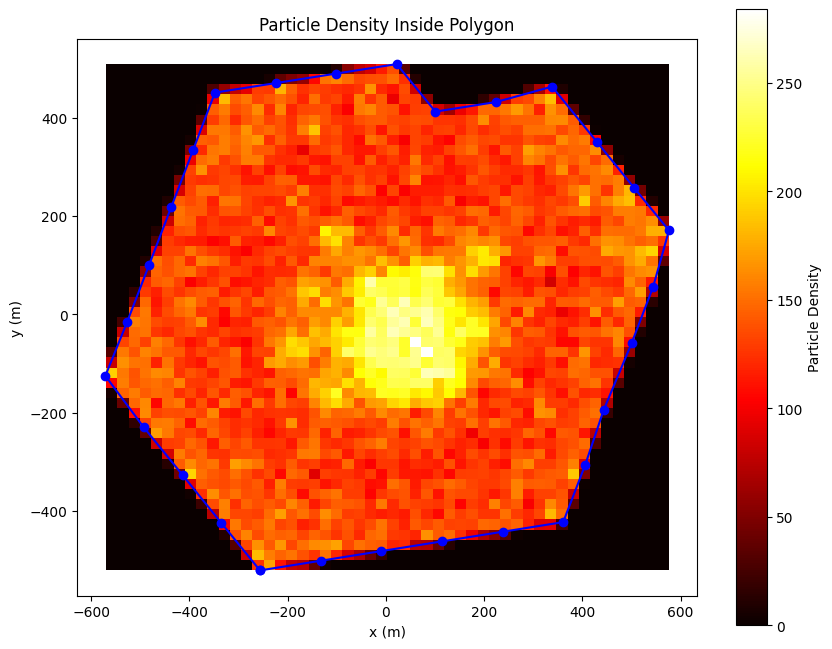

In [19]:
# Define the polygon path
polygon_path = Path(border_xy)
z_range = border_z
# Example DataFrame with particle positions
# Assume df_truth contains 'position_x' and 'position_y' columns
# Replace this with your actual data if it's loaded from a database or CSV

# Filter particles within the polygon
inside_polygon = df_truth[['position_x', 'position_y']].apply(
    lambda row: polygon_path.contains_point((row['position_x'], row['position_y'])),
    axis=1
)

# Select only particles inside the polygon
inside_z_range = (df_truth['position_z'] >= z_range[0]) & (df_truth['position_z'] <= z_range[1])
particles_inside = df_truth[inside_polygon & inside_z_range]
#particles_inside = df_truth[inside_polygon]

# Create a 2D histogram (heatmap) of particle density
heatmap, xedges, yedges = np.histogram2d(
    particles_inside['position_x'], 
    particles_inside['position_y'], 
    bins=50  # Adjust bin size for desired resolution
)

# Plot the heatmap
plt.figure(figsize=(10, 8))
plt.imshow(
    heatmap.T, origin='lower', 
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], 
    cmap='hot'
)
plt.colorbar(label="Particle Density")
plt.plot(border_xy[:, 0], border_xy[:, 1], 'o-', color="blue")  # Plot the polygon border
plt.title("Particle Density Inside Polygon")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.show()

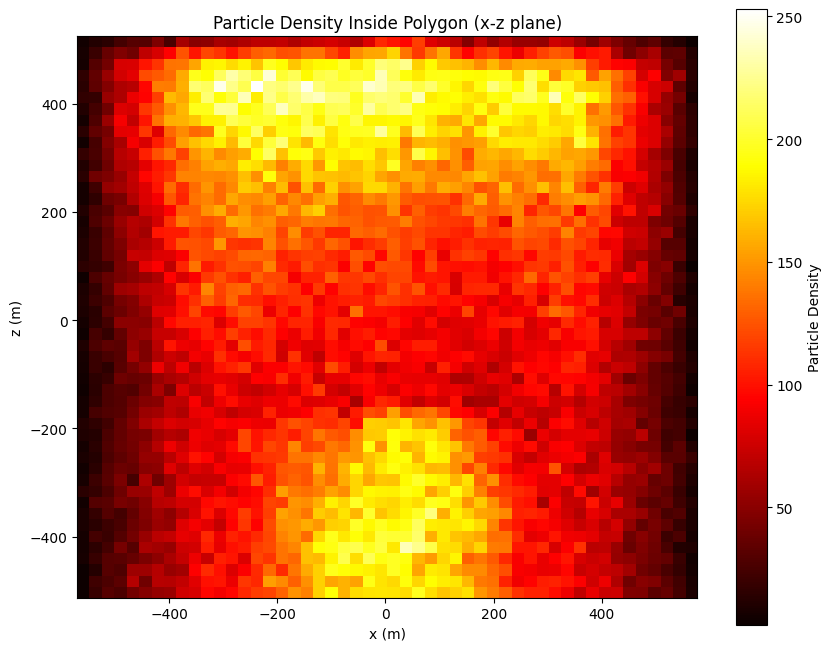

In [20]:
z_range = [-512.82, 524.56]

# Filter particles within the polygon (in the x-y plane) and within the z-range
inside_polygon = df_truth[['position_x', 'position_y']].apply(
    lambda row: polygon_path.contains_point((row['position_x'], row['position_y'])),
    axis=1
)
inside_z_range = (df_truth['position_z'] >= z_range[0]) & (df_truth['position_z'] <= z_range[1])
particles_inside = df_truth[inside_polygon & inside_z_range]

# Create a 2D histogram (heatmap) of particle density in x-z space
heatmap, xedges, zedges = np.histogram2d(
    particles_inside['position_x'], 
    particles_inside['position_z'], 
    bins=50  # Adjust bin size for desired resolution
)

# Plot the heatmap
plt.figure(figsize=(10, 8))
plt.imshow(
    heatmap.T, origin='lower', 
    extent=[xedges[0], xedges[-1], zedges[0], zedges[-1]], 
    cmap='hot'
)
plt.colorbar(label="Particle Density")
plt.title("Particle Density Inside Polygon (x-z plane)")
plt.xlabel("x (m)")
plt.ylabel("z (m)")
plt.show()

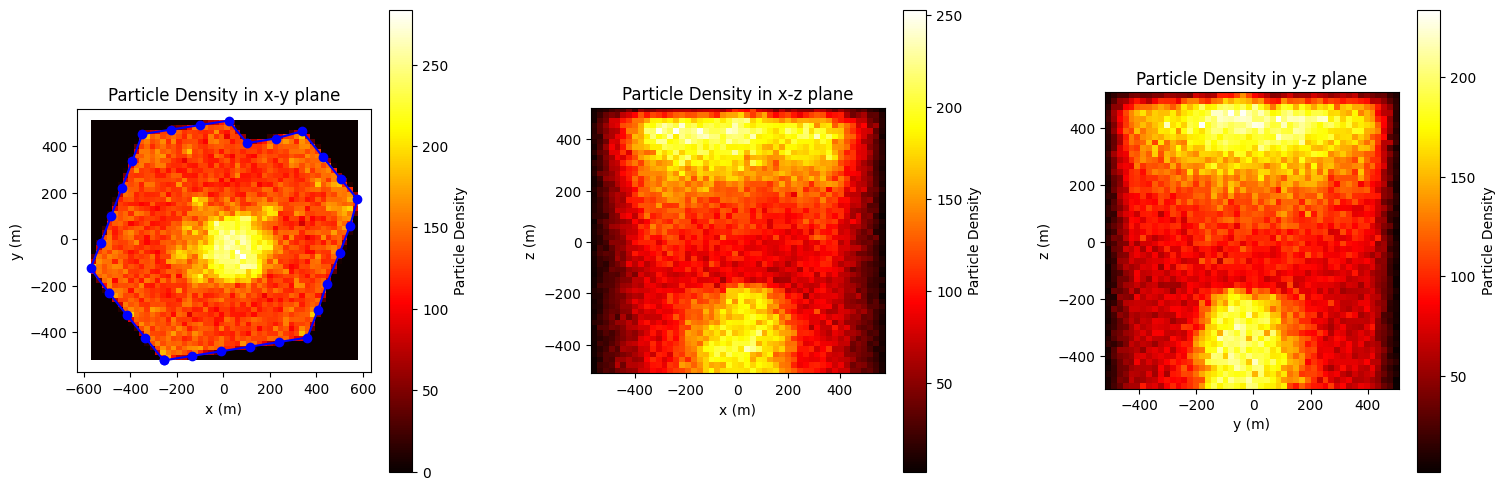

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.path import Path

# Define border_xy coordinates (example)
border_xy = np.array(
                [
                    (-256.1400146484375, -521.0800170898438),
                    (-132.8000030517578, -501.45001220703125),
                    (-9.13000011444092, -481.739990234375),
                    (114.38999938964844, -461.989990234375),
                    (237.77999877929688, -442.4200134277344),
                    (361.0, -422.8299865722656),
                    (405.8299865722656, -306.3800048828125),
                    (443.6000061035156, -194.16000366210938),
                    (500.42999267578125, -58.45000076293945),
                    (544.0700073242188, 55.88999938964844),
                    (576.3699951171875, 170.9199981689453),
                    (505.2699890136719, 257.8800048828125),
                    (429.760009765625, 351.0199890136719),
                    (338.44000244140625, 463.7200012207031),
                    (224.5800018310547, 432.3500061035156),
                    (101.04000091552734, 412.7900085449219),
                    (22.11000061035156, 509.5),
                    (-101.05999755859375, 490.2200012207031),
                    (-224.08999633789062, 470.8599853515625),
                    (-347.8800048828125, 451.5199890136719),
                    (-392.3800048828125, 334.239990234375),
                    (-437.0400085449219, 217.8000030517578),
                    (-481.6000061035156, 101.38999938964844),
                    (-526.6300048828125, -15.60000038146973),
                    (-570.9000244140625, -125.13999938964844),
                    (-492.42999267578125, -230.16000366210938),
                    (-413.4599914550781, -327.2699890136719),
                    (-334.79998779296875, -424.5),
                    (-256.1400146484375, -521.0800170898438)
                ])

# Define the polygon path for the x-y plane
polygon_path = Path(border_xy)

# Define the z-range
z_range = [-512.82, 524.56]


# Filter particles within the polygon (in the x-y plane) and within the z-range
inside_polygon = df_truth[['position_x', 'position_y']].apply(
    lambda row: polygon_path.contains_point((row['position_x'], row['position_y'])),
    axis=1
)
inside_z_range = (df_truth['position_z'] >= z_range[0]) & (df_truth['position_z'] <= z_range[1])
particles_inside = df_truth[inside_polygon & inside_z_range]

# Define bins for higher resolution in each plane
bins = 50

# Create a figure with three subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.subplots_adjust(wspace=0.4)

# Plot x-y heatmap
heatmap_xy, xedges_xy, yedges_xy = np.histogram2d(
    particles_inside['position_x'], 
    particles_inside['position_y'], 
    bins=bins
)
im1 = axs[0].imshow(
    heatmap_xy.T, origin='lower', 
    extent=[xedges_xy[0], xedges_xy[-1], yedges_xy[0], yedges_xy[-1]], 
    cmap='hot'
)
axs[0].plot(border_xy[:, 0], border_xy[:, 1], 'o-', color="blue")  # Plot the polygon border
axs[0].set_title("Particle Density in x-y plane")
axs[0].set_xlabel("x (m)")
axs[0].set_ylabel("y (m)")
fig.colorbar(im1, ax=axs[0], label="Particle Density")

# Plot x-z heatmap
heatmap_xz, xedges_xz, zedges_xz = np.histogram2d(
    particles_inside['position_x'], 
    particles_inside['position_z'], 
    bins=bins
)
im2 = axs[1].imshow(
    heatmap_xz.T, origin='lower', 
    extent=[xedges_xz[0], xedges_xz[-1], zedges_xz[0], zedges_xz[-1]], 
    cmap='hot'
)
axs[1].set_title("Particle Density in x-z plane")
axs[1].set_xlabel("x (m)")
axs[1].set_ylabel("z (m)")
fig.colorbar(im2, ax=axs[1], label="Particle Density")

# Plot y-z heatmap
heatmap_yz, yedges_yz, zedges_yz = np.histogram2d(
    particles_inside['position_y'], 
    particles_inside['position_z'], 
    bins=bins
)
im3 = axs[2].imshow(
    heatmap_yz.T, origin='lower', 
    extent=[yedges_yz[0], yedges_yz[-1], zedges_yz[0], zedges_yz[-1]], 
    cmap='hot'
)
axs[2].set_title("Particle Density in y-z plane")
axs[2].set_xlabel("y (m)")
axs[2].set_ylabel("z (m)")
fig.colorbar(im3, ax=axs[2], label="Particle Density")

plt.show()


In [22]:
pd.set_option('display.max_columns', None)
#load the filtered data from the new database
file_path_GNN ='/groups/icecube/simon/GNN/workspace/filtered.db'
file_path_volume = '/groups/icecube/simon/GNN/workspace/filtered_volume.db'
con_GNN = sqlite3.connect(file_path_GNN)
con_volume = sqlite3.connect(file_path_volume)
df_truth_GNN = pd.read_sql_query("SELECT * FROM truth", con_GNN)
df_truth_volume = pd.read_sql_query("SELECT * FROM truth", con_volume)

In [23]:
#Print the number of events in the filtered database
print(df_truth_GNN.shape[0])
print(df_truth_volume.shape[0])

151148
263330


In [24]:
df_truth_volume.head()
# Filter such that we only have SubEventID = 0.0
df_truth_volume = df_truth_volume[df_truth_volume['SubEventID'] == 0.0]


In [25]:
# Find the mismatched events between the two databases
mismatched_events = df_truth_volume[~df_truth_volume['event_no'].isin(df_truth_GNN['event_no'])]
print(f"Number of mismatched events: {mismatched_events.shape[0]}")

Number of mismatched events: 90241


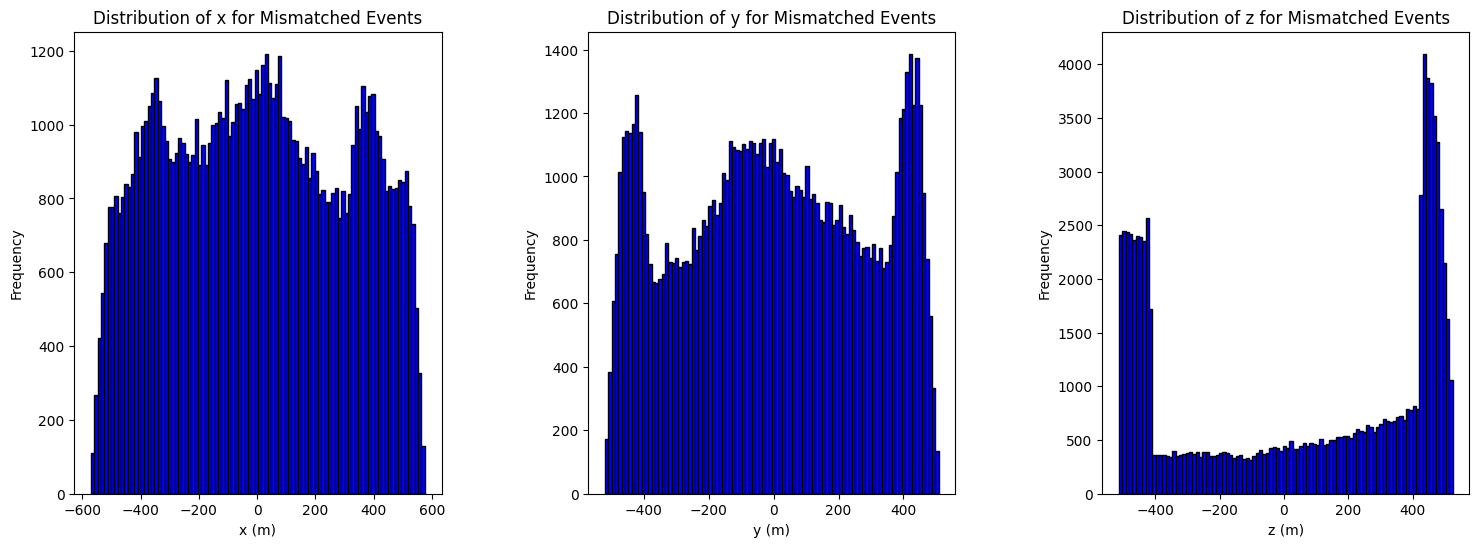

In [26]:
# Plot the distribution of the x,y,z coordinates for the mismatched events
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.subplots_adjust(wspace=0.4)

axs[0].hist(mismatched_events['position_x'], bins=100, color='blue', edgecolor='black')
axs[0].set_title('Distribution of x for Mismatched Events')
axs[0].set_xlabel('x (m)')
axs[0].set_ylabel('Frequency')

axs[1].hist(mismatched_events['position_y'], bins=100, color='blue', edgecolor='black')
axs[1].set_title('Distribution of y for Mismatched Events')
axs[1].set_xlabel('y (m)')
axs[1].set_ylabel('Frequency')

axs[2].hist(mismatched_events['position_z'], bins=100, color='blue', edgecolor='black')
axs[2].set_title('Distribution of z for Mismatched Events')
axs[2].set_xlabel('z (m)')
axs[2].set_ylabel('Frequency')

plt.show()

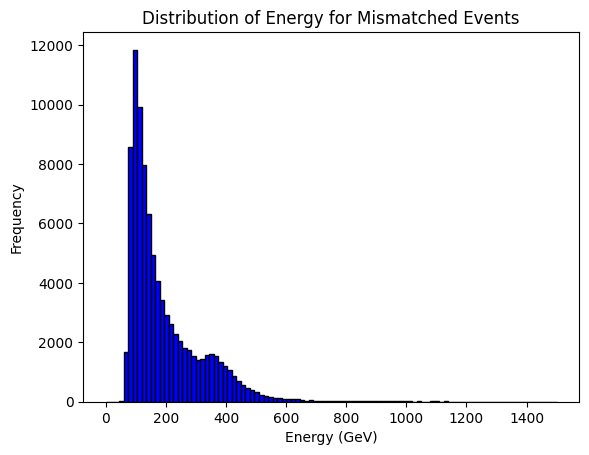

In [27]:
# Plot the energy distribution for the mismatched events
plt.hist(mismatched_events['energy'], bins=100, color='blue',range = (0,1500), edgecolor='black')
plt.title('Distribution of Energy for Mismatched Events')
plt.xlabel('Energy (GeV)')
plt.ylabel('Frequency')
plt.show()


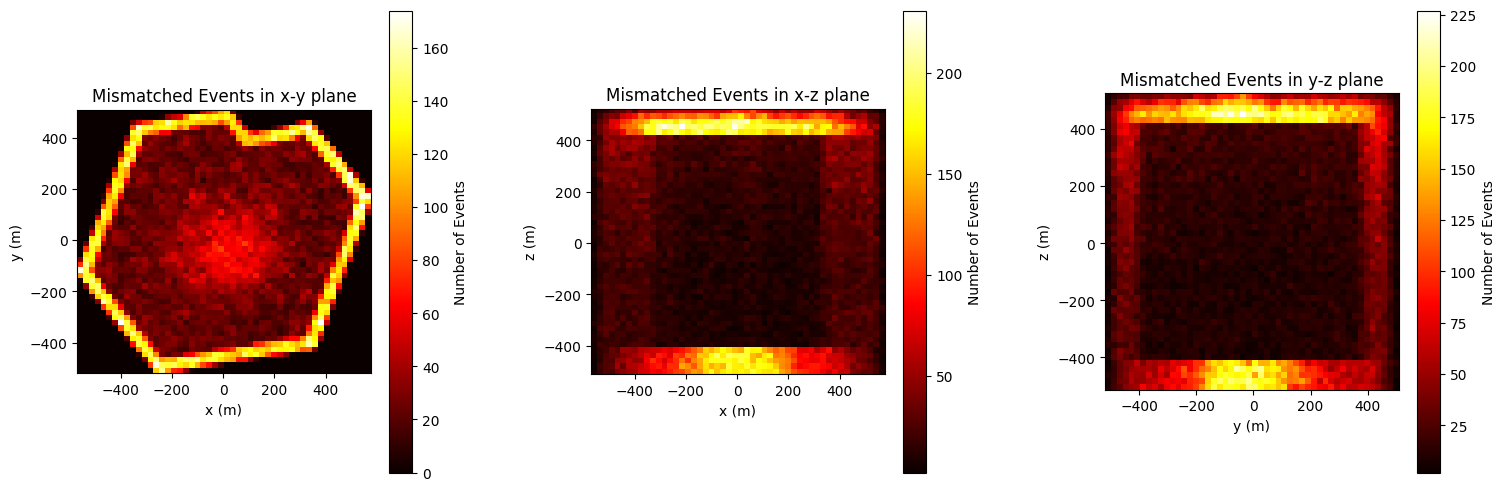

In [28]:
# Make a heatmap of the mismatched events in x-y space and x-z space and y-z space
# Define bins for higher resolution in each plane
bins = 50

# Create a figure with three subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.subplots_adjust(wspace=0.4)

# Plot x-y heatmap
heatmap_xy, xedges_xy, yedges_xy = np.histogram2d(
    mismatched_events['position_x'], 
    mismatched_events['position_y'], 
    bins=bins
)
im1 = axs[0].imshow(
    heatmap_xy.T, origin='lower', 
    extent=[xedges_xy[0], xedges_xy[-1], yedges_xy[0], yedges_xy[-1]], 
    cmap='hot'
)
axs[0].set_title("Mismatched Events in x-y plane")
axs[0].set_xlabel("x (m)")
axs[0].set_ylabel("y (m)")
fig.colorbar(im1, ax=axs[0], label="Number of Events")

# Plot x-z heatmap
heatmap_xz, xedges_xz, zedges_xz = np.histogram2d(
    mismatched_events['position_x'], 
    mismatched_events['position_z'], 
    bins=bins
)
im2 = axs[1].imshow(
    heatmap_xz.T, origin='lower', 
    extent=[xedges_xz[0], xedges_xz[-1], zedges_xz[0], zedges_xz[-1]], 
    cmap='hot'
)
axs[1].set_title("Mismatched Events in x-z plane")
axs[1].set_xlabel("x (m)")
axs[1].set_ylabel("z (m)")
fig.colorbar(im2, ax=axs[1], label="Number of Events")

# Plot y-z heatmap
heatmap_yz, yedges_yz, zedges_yz = np.histogram2d(
    mismatched_events['position_y'], 
    mismatched_events['position_z'], 
    bins=bins
)
im3 = axs[2].imshow(
    heatmap_yz.T, origin='lower', 
    extent=[yedges_yz[0], yedges_yz[-1], zedges_yz[0], zedges_yz[-1]], 
    cmap='hot'
)
axs[2].set_title("Mismatched Events in y-z plane")
axs[2].set_xlabel("y (m)")
axs[2].set_ylabel("z (m)")
fig.colorbar(im3, ax=axs[2], label="Number of Events")

plt.show()

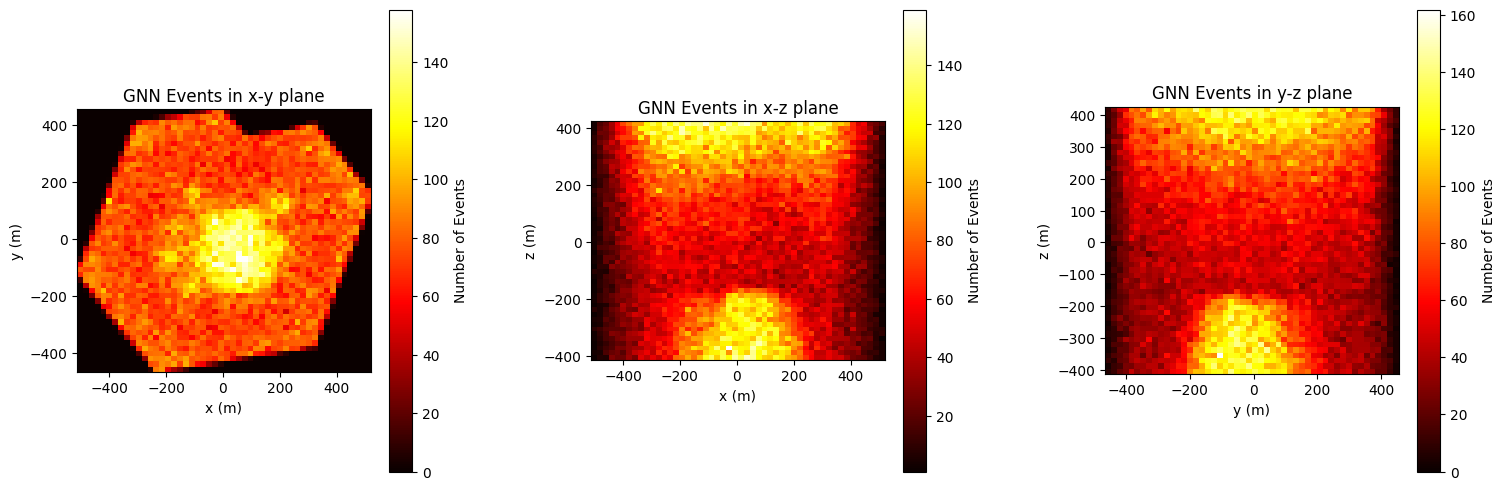

In [29]:
# Make a heatmap of the mismatched events in x-y space and x-z space and y-z space
# Define bins for higher resolution in each plane
bins = 50

# Create a figure with three subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.subplots_adjust(wspace=0.4)

# Plot x-y heatmap
heatmap_xy, xedges_xy, yedges_xy = np.histogram2d(
    df_truth_GNN['position_x'], 
    df_truth_GNN['position_y'], 
    bins=bins
)
im1 = axs[0].imshow(
    heatmap_xy.T, origin='lower', 
    extent=[xedges_xy[0], xedges_xy[-1], yedges_xy[0], yedges_xy[-1]], 
    cmap='hot'
)
axs[0].set_title("GNN Events in x-y plane")
axs[0].set_xlabel("x (m)")
axs[0].set_ylabel("y (m)")
fig.colorbar(im1, ax=axs[0], label="Number of Events")

# Plot x-z heatmap
heatmap_xz, xedges_xz, zedges_xz = np.histogram2d(
    df_truth_GNN['position_x'], 
    df_truth_GNN['position_z'], 
    bins=bins
)
im2 = axs[1].imshow(
    heatmap_xz.T, origin='lower', 
    extent=[xedges_xz[0], xedges_xz[-1], zedges_xz[0], zedges_xz[-1]], 
    cmap='hot'
)
axs[1].set_title("GNN Events in x-z plane")
axs[1].set_xlabel("x (m)")
axs[1].set_ylabel("z (m)")
fig.colorbar(im2, ax=axs[1], label="Number of Events")

# Plot y-z heatmap
heatmap_yz, yedges_yz, zedges_yz = np.histogram2d(
    df_truth_GNN['position_y'], 
    df_truth_GNN['position_z'], 
    bins=bins
)
im3 = axs[2].imshow(
    heatmap_yz.T, origin='lower', 
    extent=[yedges_yz[0], yedges_yz[-1], zedges_yz[0], zedges_yz[-1]], 
    cmap='hot'
)
axs[2].set_title("GNN Events in y-z plane")
axs[2].set_xlabel("y (m)")
axs[2].set_ylabel("z (m)")
fig.colorbar(im3, ax=axs[2], label="Number of Events")

plt.show()

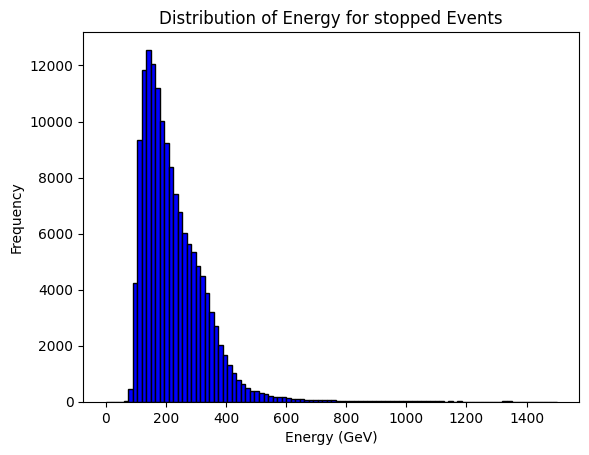

In [30]:
# Plot the energy distribution for the mismatched events
plt.hist(df_truth_GNN['energy'], bins=100, color='blue',range = (0,1500), edgecolor='black')
plt.title('Distribution of Energy for stopped Events')
plt.xlabel('Energy (GeV)')
plt.ylabel('Frequency')
plt.show()


Number of unique dom positions: 93


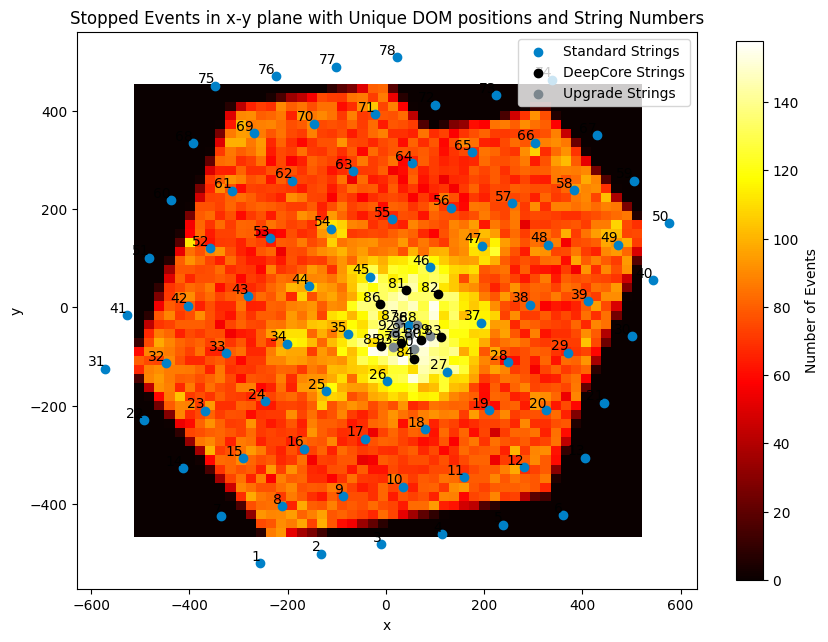

In [38]:
import matplotlib.pyplot as plt
import numpy as np

bins = 50

# Create a single figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# Plot x-y heatmap
heatmap_xy, xedges_xy, yedges_xy = np.histogram2d(
    df_truth_GNN['position_x'], 
    df_truth_GNN['position_y'], 
    bins=bins
)
im1 = ax.imshow(
    heatmap_xy.T, origin='lower', 
    extent=[xedges_xy[0], xedges_xy[-1], yedges_xy[0], yedges_xy[-1]], 
    cmap='hot'
)
fig.colorbar(im1, ax=ax, shrink = 0.7,label="Number of Events")

# Define the function to plot DOM positions with labels on the same plot
def plotXYpositionsWithLabels(df, ax):
    unique_dom_xy = df.groupby(['string']).first().reset_index()
    print(f'Number of unique dom positions: {unique_dom_xy.shape[0]}')
    standardString = unique_dom_xy[unique_dom_xy['string'] < 79]
    #Define the deepCore strings as strings with string number between 79 and 86
    deepCoreString = unique_dom_xy[(unique_dom_xy['string'] >= 79) & (unique_dom_xy['string'] <= 86)]
    upgradeString = unique_dom_xy[unique_dom_xy['string'] > 86]
    
    ax.scatter(standardString['dom_x'], standardString['dom_y'], marker='o', color=custom_colors[0], label='Standard Strings')
    ax.scatter(deepCoreString['dom_x'], deepCoreString['dom_y'], marker='o', color=custom_colors[2], label='DeepCore Strings')
    ax.scatter(upgradeString['dom_x'], upgradeString['dom_y'], marker='o', color=custom_colors[6], label='Upgrade Strings')
    for _, row in unique_dom_xy.iterrows():
        ax.text(row['dom_x'], row['dom_y'], str(int(row['string'])), fontsize=10, ha='right', va='bottom')
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title("Stopped Events in x-y plane with Unique DOM positions and String Numbers")
    ax.legend()

# Plot the scatter and labels on top of the heatmap
df_grid = df_splits[['string', 'dom_number', 'dom_x', 'dom_y', 'dom_z']].drop_duplicates()
plotXYpositionsWithLabels(df_grid, ax)



plt.show()
